In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import PIL
import pathlib

In [2]:
path = '/notebooks/sample_data/IMG_4195.jpeg'

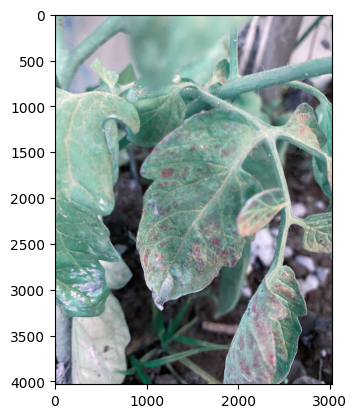

In [3]:
image = cv2.imread(path)
plt.imshow(image)

In [4]:
# convert to RGB
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 
# hsv seems good for background separation when run with 2 clusters
# image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [5]:
img = pathlib.Path(path)
# PIL.Image.open(img)


In [6]:
# # Python program to illustrate
# # Otsu thresholding type on an image

# # path to input image is specified and
# # image is loaded with imread command
# image1 = cv2.imread(path)

# # cv2.cvtColor is applied over the
# # image input with applied parameters
# # to convert the image in grayscale
# # img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
# img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# # applying Otsu thresholding
# # as an extra flag in binary
# # thresholding	
# ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY +
# 											cv2.THRESH_OTSU)	

# # # the window showing output image		
# # # with the corresponding thresholding		
# # # techniques applied to the input image	
# # cv2.imshow('Otsu Threshold', thresh1)		
# plt.imshow(thresh1)


In [7]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# pixel_values = image.reshape((-1, 1)) #grayscale
# convert to float
pixel_values = np.float32(pixel_values)

In [8]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [9]:
# number of clusters (K)
k = 2
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [10]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [11]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

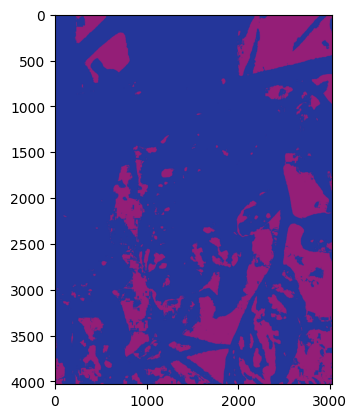

In [12]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

In [13]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 0
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)

# Bitwise-AND mask and original image
final = cv2.bitwise_and(image,image, mask=masked_image)

# show the image
plt.imshow(masked_image)
plt.show()

error: OpenCV(4.6.0) /io/opencv/modules/core/src/arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'
